# Getting started with the Greek Tischendorf text
## History
It is due to the work of Ulrik Sandborg-Petersen, PhD, MA, B.Sc. ([Aalborg Univeristy](https://www.en.aau.dk/)) that we have the Tischendorf text available in a high quality and morphologically analyzed form. Ulrik relied to a great extent on the work of Maurice A. Robinson and G. Clint Yale for the morphological anaylsis. 
In 2019 Cody Kingham, MA, MA, PhD cand ([University of Cambridge](https://www.cam.ac.uk/)) converted Ulrik's electronic version of the Tischendorf text into the ([Text Fabric](https://annotation.github.io/text-fabric/)) format and made it available as a TF app. You can check out his conversion protocoll [here](https://github.com/codykingham/tischendorf_tf/blob/master/tisch2tf/tisch2TF.ipynb).
After Cody's work I (Oliver Glanz, MTh, MA, PhD ([Andrews University](https://www.andrews.edu/)), extracted from Ulrik's compact morphological coding (available in one TF feature collection) all morphological categories as single TF features that can now be searched individually. See my extraction protocoll [here](https://nbviewer.jupyter.org/github/oliverglanz/Tischendorf-Morphology-tf-/blob/master/0000_ETCBC-TISCH-featureadd_o.glanz.ipynb).
## This notebook
In this notebook I help you getting started witht the Tischendorf app. You will learn how to run the app on your computer, how to formulate simple queries, and how to visualize your search results.

## Installing the necessary environment to run jupyter notebooks
1. Go to https://www.anaconda.com/distribution/ and download the Phython 3.7 version for your platform (available for Linux, MacOS, Windows).

2. After Anaconda has been installed start the ```Anaconda prompt``` terminal.

3. Once the terminal is available you want to install the TextFabric environment that holds all the biblical data of the ETCBC research group (http://etcbc.nl/). You do so by writing the following command into the terminal:

```
pip3 install text-fabric
``` 
or when you are on windows 
```
pip install text-fabric
```

After TF has been installed run the following command to make sure that you have upgraded to the latest TF version:

```
pip3 install --upgrade text-fabric
```
or when you are on Windows
```
pip install --upgrade text-fabric
```

Finally, to work most smoothly with a table of content (toc) it makes a lot of sense to also install the following extension in the terminal (See [Jupyter Notebook Extensions](https://towardsdatascience.com/jupyter-notebook-extensions-517fa69d2231)):
```
pip3 install jupyter_contrib_nbextensions && jupyter contrib nbextension install 
```
or when you are on Windows
```
pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install -user
```
## Starting the Text-Fabric Browser
The quickest and easiest way to use Text-Fabric's text display and search options is to use the Text-Fabric Browser. You can start the TF browswer with the following command in the console:
```py
text-fabric tisch
```
This will start the Tischedorf corpus of TF:
![text-fabric_tisch.png](attachment:text-fabric_tisch.png)

If you want to start another corpus like the Biblia Hebraica Stuttgartensia you would have to alter the command:
```py
text-fabric bhsa
```
![text-fabric_bhsa.png](attachment:text-fabric_bhsa.png)

If you want to start another corpus like the Dead Sea Scrolls you would have to alter the command:
```py
text-fabric dss
```
![text-fabric_dss.png](attachment:text-fabric_dss.png)

A full list of apps can be found here: https://annotation.github.io/text-fabric/About/Corpora/

## Starting a jupyter notebook
1. Now all the tools are installed for doing our exegetical research. Lets fire up Jupyter Notebooks by executing the command ```jupyter notebook``` in your Anaconda prompt termnal. Your default webbrowser will start and showing you the folder structure of your default OS folder.

2. Now Download this notebook.
![Annotation2019-06-09_220638-tisch.png](attachment:Annotation2019-06-09_220638-tisch.png)

3. Check where your default folder is located and copy this downloaded notebook into that folder.

4. Refresh your broswer and you will see the downloaded folder appear.

5. You can now start this notebook by clicking on the filename within your jupyter's folder overview. 

6. Now you are ready to go!


## Loading important apps
This very jupyter notebook is now running in your browser!
Lets load some important python apps so that we can start writing our first queries.

Run the code cells below.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [3]:
A = use('tisch', hoist=globals())

	connecting to online GitHub repo annotation/app-tisch ... connected
Using TF-app in C:\Users\Oliver Glanz/text-fabric-data/annotation/app-tisch/code:
	rv.1.2=#6bbf132c3854f186062b417a981aef0f51a8b714 (latest release)
	connecting to online GitHub repo codykingham/tischendorf_tf ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/codykingham/tischendorf_tf/tf/2.8:
	rv.1.12=#c8a8b8c0d9f1746f050f4da0a3e0421835b378df (latest release)
   |     0.00s No structure info in otext, the structure part of the T-API cannot be used


# What books are available in the ETCBC Tisch collection?
Text-Fabric has two special features, `otype` (object types) and `oslots` (object slots), that must occur in every Text-Fabric data set.
`otype` tells you for each node its type, and you can ask for the number of `slot`s in the text.
Lets check out what `otype`s are available by using the `F` function. `F` gives access to all features. Every feature has a method
`freqList()`
to generate a frequency list of its values, higher frequencies first.


```python
slotType = 'word'
otext = {'fmt:text-orig-full':'{qere} ',
         'sectionTypes':'book,chapter,verse',
         'sectionFeatures':'book,chapter,verse'}

generic = {'Name': 'Morph-GNT Tischendorf',
           'Version': None, # to be filled in
           'Author': 'Constantin von Tischendorf',
           'Editors': 'Ulrik Sandborg-Petersen, G. Clint Yale, and Maurice A. Robinson',
           'Converter': 'Cody Kingham', 
           'Source:':'https://github.com/morphgnt/tischendorf-data/',
           'Note':'Feature descriptions adapted from tischendorf-data README'}

intFeatures = {'chapter', 'para', 'verse'}

featureMeta = {'book': {'description': 'A book name'},
               'chapter': {'description': 'A chapter number'},
               'verse': {'description': 'A verse number'},
               'book_code':{'description': 'Short book abbreviation'},
               'para': {'description': 'A paragraph number'},
               'ketiv': {'descrption': 'The text as it is written in the printed Tischendorf'},
               'qere': {'description': 'The text as the editor thinks it should have been'},
               'morph': {'description': 'Word morphological tag based on Maurice A Robinson\'s analysis'},
               'strongs': {'description': 'A word\'s number in Strongs'},
               'vrsnum': {'description': 'N-word in verse'},
               'str_lem': {'description': 'Word lemma that corresponds to The NEW Strong\'sComplete Dictionary of Bible Words'},
               'anlex_lem': {'description': 'Word lemma that corresponds to Friberg, Friberg and Miller\'s ANLEX'}
              }
```

In [4]:
F.otype.all

('book', 'chapter', 'paragraph', 'lex', 'verse', 'word')

These are then the object types we can work with. But what features do those object types (`otype`) have? Lets investigate the scrolls first.

In [5]:
TF.featureSets

{'nodes': {'anlex_lem',
  'book',
  'book_code',
  'case',
  'chapter',
  'freq_lex',
  'gloss',
  'gn',
  'ketiv',
  'mood',
  'morph',
  'nountype',
  'nu',
  'originterrdiff',
  'otype',
  'para',
  'prntyp',
  'ps',
  'qere',
  'sp',
  'str_lem',
  'strongs',
  'verse',
  'voice',
  'vrsnum',
  'vt'},
 'edges': {'oslots'},
 'configs': {'otext'},
 'computeds': {'__boundary__',
  '__levDown__',
  '__levUp__',
  '__levels__',
  '__order__',
  '__rank__',
  '__sections__',
  '__structure__'}}

In [6]:
verse1 = A.nodeFromSectionStr('Matthew 1:1')
A.plain(verse1)

In [7]:
wordShow = (1, 2, 3)
for word in wordShow:
  A.pretty(word)

In [8]:
phraseShow = 3
A.pretty(phraseShow)

# word searching
## simple searches
### Searching for one word only
#### Lets search for the word "Ἰησοῦς" in the nominative case in the gospel of John:

- lexeme = **Ἰησοῦς**
- case = **nominative**

In [9]:
JesusInJohn = '''
book book=John
    word anlex_lem=Ἰησοῦς case=nominative
'''
JesusInJohn=A.search(JesusInJohn)

XXXX (True, frozenset({'John'}))
XXXX (True, frozenset({'Ἰησοῦς'}))
XXXX (True, frozenset({'nominative'}))
  0.18s 197 results


Lets show the results and highlight them in magenta!

In [10]:
A.table(JesusInJohn, start=1, end=10, condensed=True, colorMap={2: 'magenta'})

n,p,verse,word
1,John 1:38,στραφεὶς ὁ Ἰησοῦς καὶ θεασάμενος αὐτοὺς ἀκολουθοῦντας λέγει αὐτοῖς·,Ἰησοῦς
2,John 1:43,"ἤγαγεν αὐτὸν πρὸς τὸν Ἰησοῦν. ἐμβλέψας αὐτῷ ὁ Ἰησοῦς εἶπεν· σὺ εἶ Σίμων ὁ υἱὸς Ἰωάννου, σὺ κληθήσῃ Κηφᾶς, ὃ ἑρμηνεύεται Πέτρος.",Ἰησοῦς
3,John 1:44,"Τῇ ἐπαύριον ἠθέλησεν ἐξελθεῖν εἰς τὴν Γαλιλαίαν, καὶ εὑρίσκει Φίλιππον. καὶ λέγει αὐτῷ ὁ Ἰησοῦς, ἀκολούθει μοι.","Ἰησοῦς,"
4,John 1:48,"εἶδεν Ἰησοῦς τὸν Ναθαναὴλ ἐρχόμενον πρὸς αὐτὸν καὶ λέγει περὶ αὐτοῦ· ἴδε ἀληθῶς Ἰσραηλείτης, ἐν ᾧ δόλος οὐκ ἔστιν.",Ἰησοῦς
5,John 1:49,λέγει αὐτῷ Ναθαναήλ· πόθεν με γινώσκεις; ἀπεκρίθη Ἰησοῦς καὶ εἶπεν αὐτῷ· πρὸ τοῦ σε Φίλιππον φωνῆσαι ὄντα ὑπὸ τὴν συκῆν εἶδόν σε.,Ἰησοῦς
6,John 1:51,"ἀπεκρίθη Ἰησοῦς καὶ εἶπεν αὐτῷ· ὅτι εἶπόν σοι ὅτι εἶδόν σε ὑποκάτω τῆς συκῆς, πιστεύεις; μείζω τούτων ὄψῃ.",Ἰησοῦς
7,John 2:2,ἐκλήθη δὲ καὶ ὁ Ἰησοῦς καὶ οἱ μαθηταὶ αὐτοῦ εἰς τὸν γάμον.,Ἰησοῦς
8,John 2:4,"λέγει αὐτῇ ὁ Ἰησοῦς· τί ἐμοὶ καὶ σοί, γύναι; οὔπω ἥκει ἡ ὥρα μου.",Ἰησοῦς·
9,John 2:7,λέγει αὐτοῖς ὁ Ἰησοῦς· γεμίσατε τὰς ὑδρίας ὕδατος. καὶ ἐγέμισαν αὐτὰς ἕως ἄνω.,Ἰησοῦς·
10,John 2:11,"ταύτην ἐποίησεν ἀρχὴν τῶν σημείων ὁ Ἰησοῦς ἐν Κανὰ τῆς Γαλιλαίας καὶ ἐφανέρωσεν τὴν δόξαν αὐτοῦ, καὶ ἐπίστευσαν εἰς αὐτὸν οἱ μαθηταὶ αὐτοῦ.",Ἰησοῦς


#### Searching for the English gloss "Jesus" instead of "Ἰησοῦς"

In [11]:
JesusInJohn2 = '''
book book=John
    word gloss=Jesus case=nominative

% lets keep the nominative case

'''
JesusInJohn2=A.search(JesusInJohn2)

XXXX (True, frozenset({'John'}))
XXXX (True, frozenset({'Jesus'}))
XXXX (True, frozenset({'nominative'}))
  0.22s 197 results


In [12]:
A.table(JesusInJohn2, start=1, end=2, condensed=True, colorMap={2: 'pink'})

n,p,verse,word
1,John 1:38,στραφεὶς ὁ Ἰησοῦς καὶ θεασάμενος αὐτοὺς ἀκολουθοῦντας λέγει αὐτοῖς·,Ἰησοῦς
2,John 1:43,"ἤγαγεν αὐτὸν πρὸς τὸν Ἰησοῦν. ἐμβλέψας αὐτῷ ὁ Ἰησοῦς εἶπεν· σὺ εἶ Σίμων ὁ υἱὸς Ἰωάννου, σὺ κληθήσῃ Κηφᾶς, ὃ ἑρμηνεύεται Πέτρος.",Ἰησοῦς


#### Searching for the Strong number "2424" instead of the gloss "Jesus" or the lexeme "Ἰησοῦς"

In [13]:
JesusInJohn3 = '''
book book=John
    word strongs=2424 case=nominative

% lets keep the nominative case

'''
JesusInJohn3=A.search(JesusInJohn3)

XXXX (True, frozenset({'John'}))
XXXX (True, frozenset({'2424'}))
XXXX (True, frozenset({'nominative'}))
  0.21s 197 results


In [14]:
A.table(JesusInJohn3, start=1, end=2, condensed=True, colorMap={2: 'gold'})

n,p,verse,word
1,John 1:38,στραφεὶς ὁ Ἰησοῦς καὶ θεασάμενος αὐτοὺς ἀκολουθοῦντας λέγει αὐτοῖς·,Ἰησοῦς
2,John 1:43,"ἤγαγεν αὐτὸν πρὸς τὸν Ἰησοῦν. ἐμβλέψας αὐτῷ ὁ Ἰησοῦς εἶπεν· σὺ εἶ Σίμων ὁ υἱὸς Ἰωάννου, σὺ κληθήσῃ Κηφᾶς, ὃ ἑρμηνεύεται Πέτρος.",Ἰησοῦς


#### Lets look for all words that are verbs, 2nd person, singular, perfect, indicative, and passive!
- part of speech = **verbs**
- number = **singular**
- person = **2nd person**
- verbal tense = **perfect**
- mood = **indicative**
- voice = **passive**

In [15]:
specialverb ='''
book
    word sp=verb nu=sg ps=p2 vt=perfect mood=indicative voice=passive
'''
specialverb=A.search(specialverb)

XXXX (True, frozenset({'verb'}))
XXXX (True, frozenset({'sg'}))
XXXX (True, frozenset({'p2'}))
XXXX (True, frozenset({'perfect'}))
XXXX (True, frozenset({'indicative'}))
XXXX (True, frozenset({'passive'}))
  0.21s 3 results


Lets show the results and highlight them in yellow!

In [16]:
A.table(specialverb, start=1, end=10, condensed=True, colorMap={2: 'yellow'})

You can also let TF show all the morphological coding within each verse by adding to your query all other morphological catories and then run `A.show` instead of `A.table`:

In [17]:
specialverb2 ='''
book
    word sp=verb nu=sg ps=p2 vt=perfect mood=indicative voice=passive anlex_lem* case* gloss* gn* ketiv* morph* nountype* originterrdiff* qere* str_lem* strongs* prntype*
'''
specialverb2=A.search(specialverb2)

 0 
 1 book
 2     word sp=verb nu=sg ps=p2 vt=perfect mood=indicative voice=passive anlex_lem* case* gloss* gn* ketiv* morph* nountype* originterrdiff* qere* str_lem* strongs* prntype*
 3 
Missing feature "prntype" in line(s) 2


XXXX (True, frozenset({'verb'}))
XXXX (True, frozenset({'sg'}))
XXXX (True, frozenset({'p2'}))
XXXX (True, frozenset({'perfect'}))
XXXX (True, frozenset({'indicative'}))
XXXX (True, frozenset({'passive'}))
  0.00s Cannot load feature "prntype": not in dataset
  0.00s 0 results


In [18]:
A.show(specialverb2, start=1, end=3, condensed=True, colorMap={2: 'yellow'})

### Searching for word combinations
#### Searching for "the testimony of Jesus"
As we search for the phrase we want to make sure that "martyria" can have and case and "Jaesu" needs to be in the genetive case.
The operator `<:` determines that `w2` needs to follow `<` `w1` without any word inbetween `:`.

In [19]:
TestimonyOfJesus = '''
book
    w1:word anlex_lem=μαρτυρία
    w2:word anlex_lem=Ἰησοῦς case=genitive
w1 <: w2
'''
TestimonyOfJesus=A.search(TestimonyOfJesus)

XXXX (True, frozenset({'μαρτυρία'}))
XXXX (True, frozenset({'Ἰησοῦς'}))
XXXX (True, frozenset({'genitive'}))
  0.38s 6 results


In [20]:
A.show(TestimonyOfJesus, start=1, end=10, condensed=True, colorMap={2: 'red', 3: 'orange'})

## Complex searches
### Lets search for corellated conjunctions 
In Col 2:16-17 we find a syntactical construction that involves a series of conjunctions (καί and ἤ). The critical edition of the [NA28](https://ref.ly/logosres/na28?ref=BibleNA27.Col2.18) presents the text in the following way:
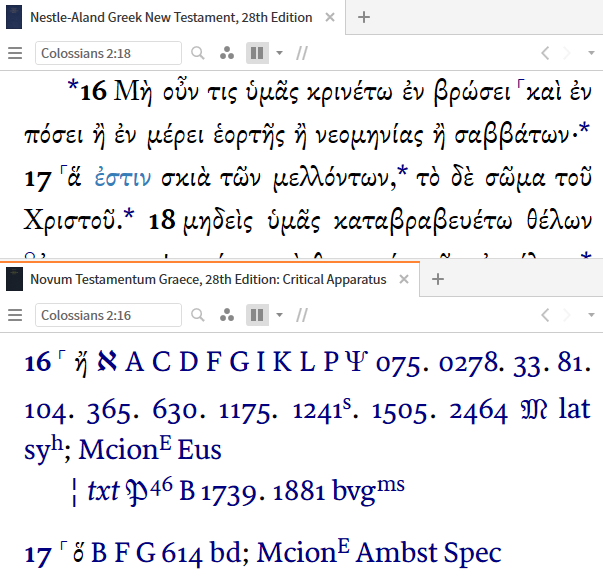

The syntactical structure is differently analyzed by scholars. Below you see a comparison between the [cascadia](https://ref.ly/logosres/csgntsbl?ref=BibleSBLGNT.Col2.16) and [opentext](https://ref.ly/logosres/opentextgraph?ref=BibleNA27.Col2.16) analysis. One needs to keep in mind that the NA edition renders the text slightly different (see ἤ => καί) than the Mehrheitstext that is followed by the SBL edition (see καί => ἤ) :
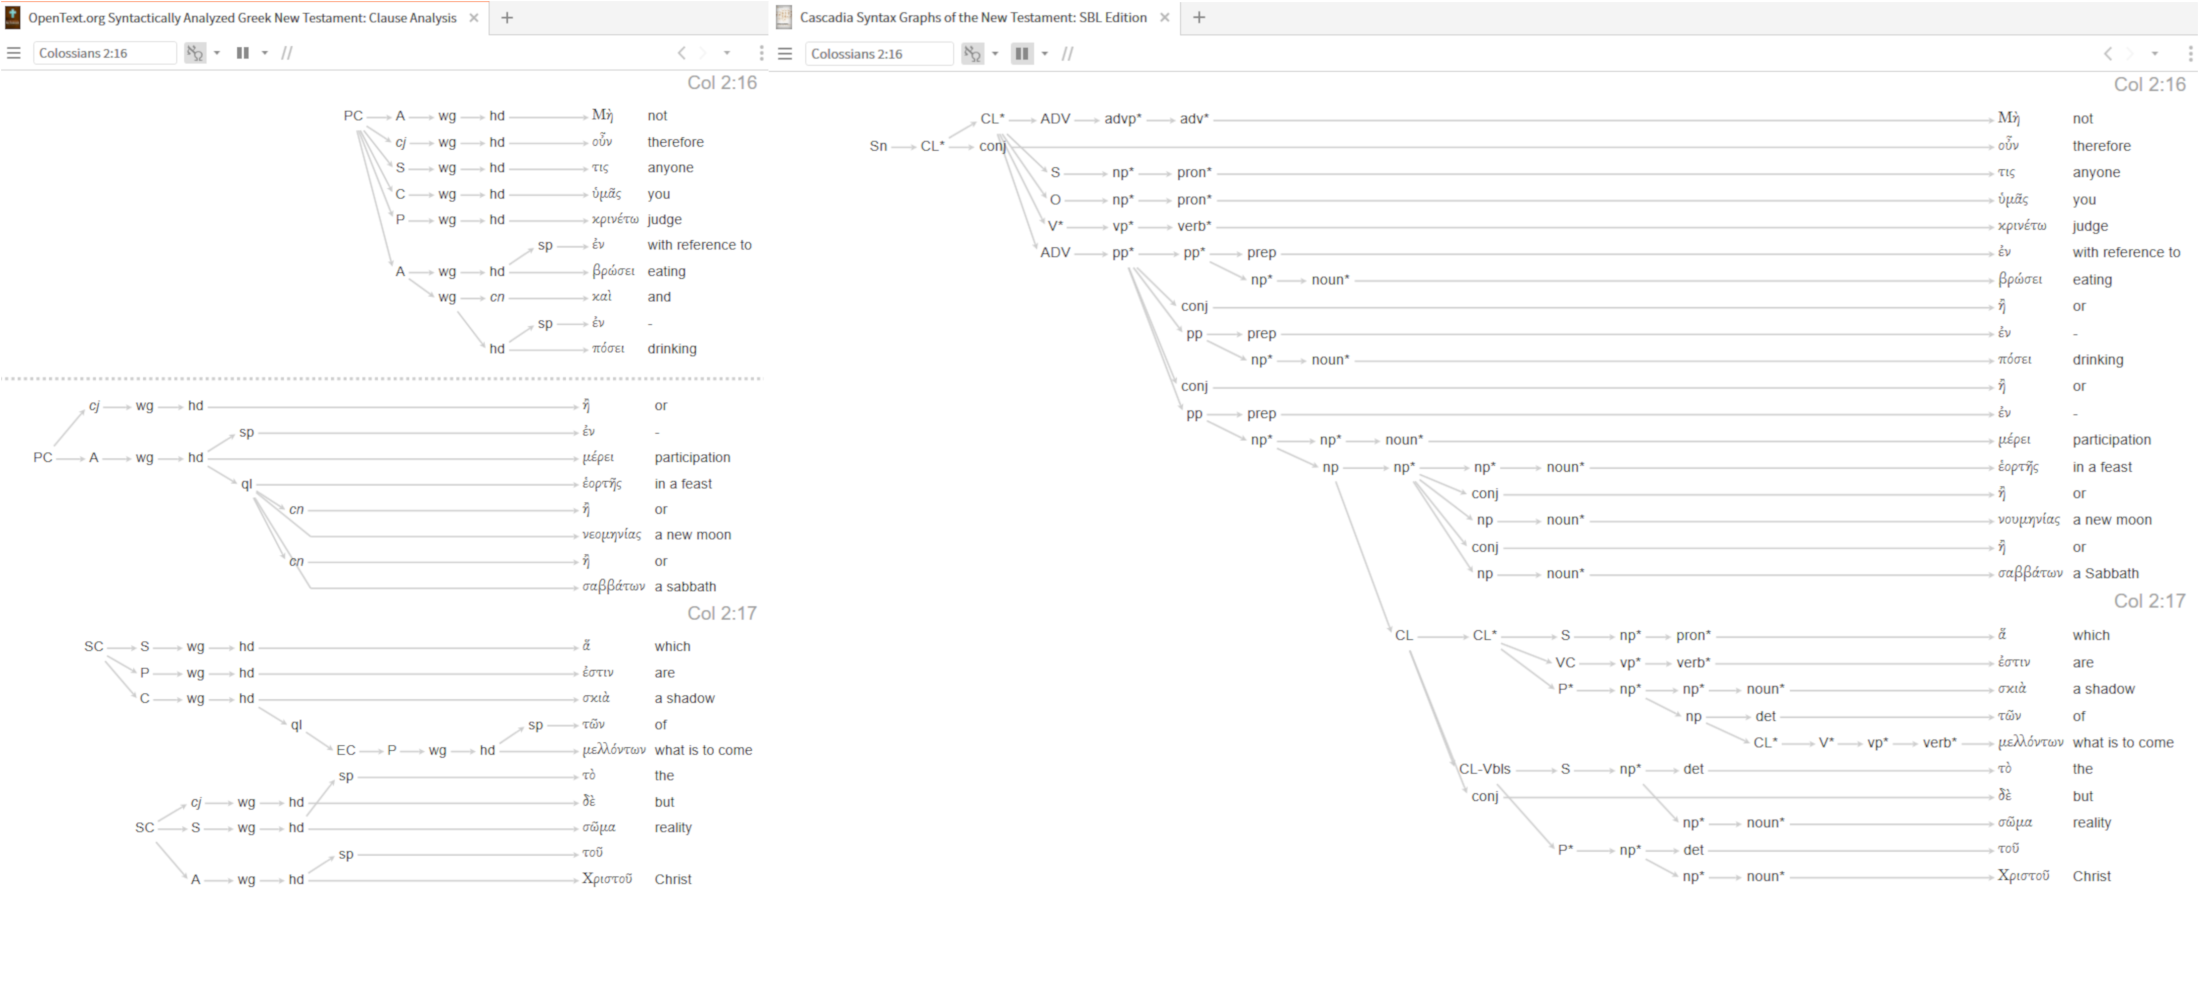



Lets look first at the conjunction sequence that we have in the NA28. Does this appear elsewhere in the Tischendorf text?

In [21]:
KaiHeHe ='''
verse
    w1:word
    w2:word anlex_lem=καί
    w3:word anlex_lem=ἤ
    w4:word anlex_lem=ἤ    
w1 < w2
w2 < w3
w3 < w4
'''
KaiHeHe=A.search(KaiHeHe)

XXXX (True, frozenset({'καί'}))
XXXX (True, frozenset({'ἤ'}))
XXXX (True, frozenset({'ἤ'}))
  0.68s 114 results


In [22]:
A.show(KaiHeHe, start=1, end=20, condensed=True, colorMap={2: 'grey', 3: 'red', 4: 'magenta', 5: 'magenta'})

This is too much of noisy data. Lets reduce the distance between the conjunctions.

In [23]:
KaiHeHe2 ='''
v1:verse
    w1:word
    w2:word anlex_lem=καί
    w3:word anlex_lem=ἤ
    w4:word anlex_lem=ἤ    
v1 =4: w1
w1 <2: w2
w2 <2: w3
w3 <2: w4
'''
KaiHeHe2=A.search(KaiHeHe2)

XXXX (True, frozenset({'καί'}))
XXXX (True, frozenset({'ἤ'}))
XXXX (True, frozenset({'ἤ'}))
  0.64s 25 results


In [24]:
A.show(KaiHeHe2, start=1, end=200, condensed=True, colorMap={2: 'grey', 3: 'red', 4: 'magenta', 5: 'magenta'})

Lets look at the pattern that appears in the Mehrheitstext.

In [25]:
NoKaiButHeHe ='''
verse
/without/
    w0:word anlex_lem=καί
    w1:word anlex_lem=ἤ
    w2:word anlex_lem=ἤ
    w0 < w1
    w1 < w2
/-/
    w1:word anlex_lem=ἤ
    w2:word anlex_lem=ἤ
    w3:word anlex_lem=ἤ
    w1 < w2
    w2 < w3
'''
NoKaiButHeHe=A.search(NoKaiButHeHe)

XXXX (True, frozenset({'ἤ'}))
XXXX (True, frozenset({'ἤ'}))
XXXX (True, frozenset({'ἤ'}))
XXXX (True, frozenset({'καί'}))
XXXX (True, frozenset({'ἤ'}))
XXXX (True, frozenset({'ἤ'}))
  0.89s 68 results


In [26]:
A.show(NoKaiButHeHe, start=1, end=10, condensed=True, colorMap={2: 'magenta', 3: 'magenta', 4: 'magenta'})

In [27]:
A.table(NoKaiButHeHe, start=1, end=20, condensed=True, colorMap={2: 'magenta', 3: 'magenta', 4: 'magenta'})

No "either ... or" construction in:
- Mat 6:31 (NA28)
- Mark 10:29
- Luk 18:29
- Rom 8:35
- 1 Cor 5:11 (its not the first ἢ  but the previous ἐάν  that initiates the "either")
- 1 Cor 14:6 (its not the first ἢ  but the previous ἐάν  that initiates the "either")
- 1 Thes 2:19 
- 1 Peter 4:15

The only "either or" constrution can be found in Mk 13:35, which would be an exception to the rule. 


**Conclusion: it is highly unlikely that Col 2:16 resembles an "either ... or" construction. If there are three ἢ  conjunctions appear in a sequence they trigger the meaning "or ... or".**

The following query does not exclude a preceding καὶ:

In [28]:
HeHeHe ='''
verse
    word anlex_lem=ἤ
    < word anlex_lem=ἤ
    < word anlex_lem=ἤ    
'''
HeHeHe=A.search(HeHeHe)

XXXX (True, frozenset({'ἤ'}))
XXXX (True, frozenset({'ἤ'}))
XXXX (True, frozenset({'ἤ'}))
  0.42s 102 results


In [29]:
A.table(HeHeHe, start=1, end=10, condensed=True, colorMap={2: 'magenta', 3: 'magenta', 4: 'magenta'})

# Producing some graphical representations
Since we will be using the python based visualization tools we need to first export our TF search results as a table and then load that table as a pandas dataframe.
## The distribution of Jesus as subject (nominative case) in the NT

In [30]:
JesusInNT = '''
book
    word anlex_lem=Ἰησοῦς case=nominative
'''
JesusInNT=A.search(JesusInNT)

XXXX (True, frozenset({'Ἰησοῦς'}))
XXXX (True, frozenset({'nominative'}))
  0.20s 456 results


In [31]:
A.table(JesusInNT, start=1, end=5, condensed=True, colorMap={2: 'gold'})

n,p,verse,word
1,Matthew 1:16,"Ἰακὼβ δὲ ἐγέννησεν τὸν Ἰωσὴφ τὸν ἄνδρα Μαρίας, ἐξ ἧς ἐγεννήθη Ἰησοῦς ὁ λεγόμενος Χριστός.",Ἰησοῦς
2,Matthew 3:13,Τότε παραγίνεται ὁ Ἰησοῦς ἀπὸ τῆς Γαλιλαίας ἐπὶ τὸν Ἰορδάνην πρὸς τὸν Ἰωάννην τοῦ βαπτισθῆναι ὑπ’ αὐτοῦ.,Ἰησοῦς
3,Matthew 3:15,"ἀποκριθεὶς δὲ ὁ Ἰησοῦς εἶπεν πρὸς αὐτόν, ἄφες ἄρτι, οὕτως γὰρ πρέπον ἐστὶν ἡμῖν πληρῶσαι πᾶσαν δικαιοσύνην. τότε ἀφίησιν αὐτόν.",Ἰησοῦς
4,Matthew 3:16,"βαπτισθεὶς δὲ ὁ Ἰησοῦς εὐθὺς ἀνέβη ἀπὸ τοῦ ὕδατος· καὶ ἰδοὺ ἀνεῴχθησαν οἱ οὐρανοί, καὶ εἶδεν πνεῦμα θεοῦ καταβαῖνον ὡσεὶ περιστερὰν ἐρχόμενον ἐπ’ αὐτόν·",Ἰησοῦς
5,Matthew 4:1,"Τότε ὁ Ἰησοῦς ἀνήχθη εἰς τὴν ἔρημον ὑπὸ τοῦ πνεύματος, πειρασθῆναι ὑπὸ τοῦ διαβόλου.",Ἰησοῦς


In [32]:
A.export(JesusInNT, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='JesusInNT.tsv')

In [33]:
JesusInNT=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/JesusInNT.tsv',delimiter='\t',encoding='utf-16')
JesusInNT.head()

,R,S1,S2,S3,NODE1,TYPE1,NODE2,TYPE2,TEXT2,anlex_lem2,case2
0,1,Matthew,1,16,137712,book,243,word,Ἰησοῦς,Ἰησοῦς,nominative
1,2,Matthew,3,13,137712,book,1130,word,Ἰησοῦς,Ἰησοῦς,nominative
2,3,Matthew,3,15,137712,book,1163,word,Ἰησοῦς,Ἰησοῦς,nominative
3,4,Matthew,3,16,137712,book,1183,word,Ἰησοῦς,Ἰησοῦς,nominative
4,5,Matthew,4,1,137712,book,1223,word,Ἰησοῦς,Ἰησοῦς,nominative


### Simple Bar plot

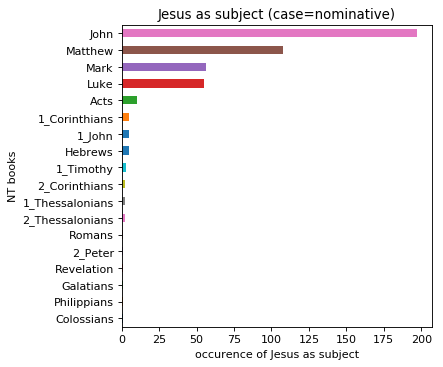

In [34]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
JesusInNT.groupby("S1").size().sort_values(ascending=True).plot.barh()
plt.xlabel('occurence of Jesus as subject')
plt.ylabel('NT books')
plt.title('Jesus as subject (case=nominative)')
plt.show()

### Simple Pie chart

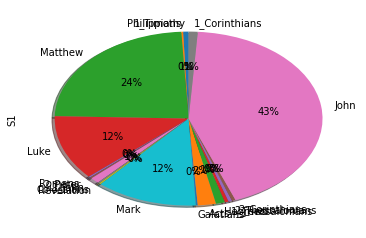

In [35]:
JesusInNT.S1.value_counts(sort=False).plot.pie(autopct='%1.0f%%', shadow=True, startangle=90)
plt.show()

### Simple Scatter Plot

Text(0.5,20.8,'NT books')

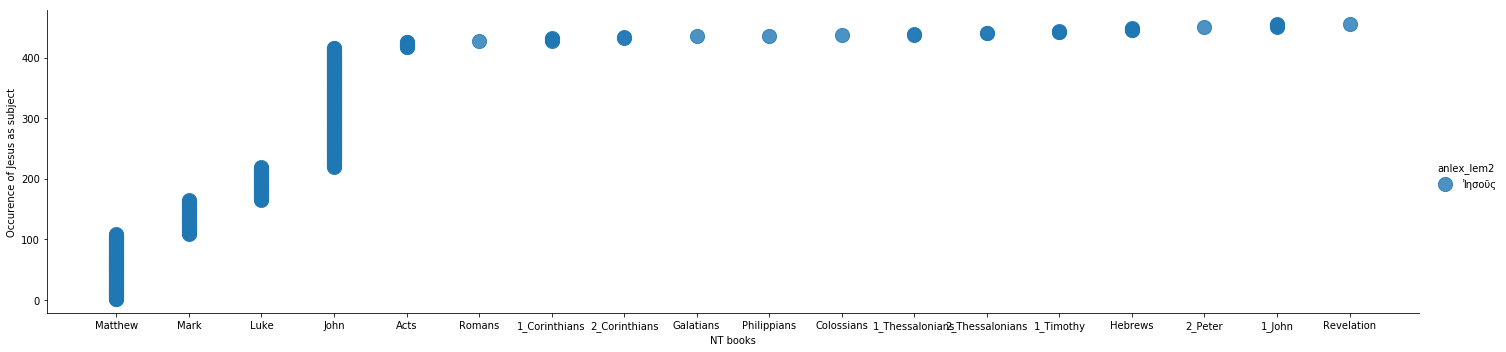

In [36]:
sns.lmplot(x="S1", y="R", data=JesusInNT, hue='anlex_lem2', height=5, aspect=4/1, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('Occurence of Jesus as subject')
ax.set_xlabel('NT books')